# Earnings Based on College Majors

This is an excercise from [dataquest.io Exploratory Data Visualization course](https://www.dataquest.io/course/exploratory-data-visualization). The aim is to practice using matplotlib and pandas for visualizing data in jupyter notebook and to observe any correlations between college majors and median earnings.

The data is downloaded from [a fivethirtyeight repo - college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [9]:
# drop rows with null values
recent_grads.dropna(inplace=True)
recent_grads.reset_index(inplace=True)

## Do students in more popular majors make more money?

To answer this question let's create a scatter plot with total number of people with the major (`Total`) on x axis and the median salary (`Median`) on the y axis. If the answer to the quesion is 'yes' we should see at least a slight positive correlation in the chart.

In [25]:
# only compare majors with large sample size 
large_sample_majors = recent_grads[recent_grads['Sample_size'] > 100]

<AxesSubplot:title={'center':'Median salary over total major graduates'}, xlabel='Total', ylabel='Median'>

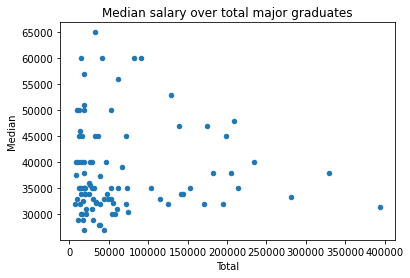

In [31]:
large_sample_majors.plot(
    x='Total',
    y='Median',
    title='Median salary over total major graduates',
    kind='scatter'
)

There is no correlation and definitely not a positive one, so the answer is **'no'**.

## Do students that majored in subjects that were majority female make more money?

To visualize the answer to this question we can compare the histograms of earnings of predominantly male and predominantly female major graduates.

In [37]:
female_majors = large_sample_majors[large_sample_majors['ShareWomen'] > 0.5]
male_majors = large_sample_majors[large_sample_majors['ShareWomen'] < 0.5]

<AxesSubplot:ylabel='Frequency'>

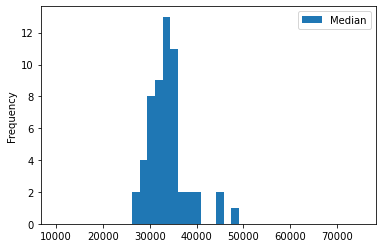

In [45]:
female_majors.plot(y='Median', kind='hist', bins=40, range=(10000,75000))

<AxesSubplot:ylabel='Frequency'>

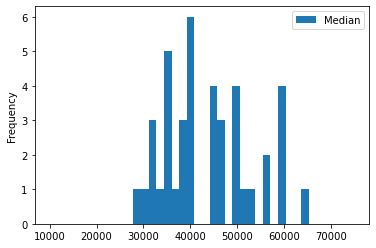

In [46]:
male_majors.plot(y='Median', kind='hist', bins=40, range=(10000,75000))

We can see that t